In [209]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [210]:
# read the illinois state shp data
illinois_shp = gpd.read_file('raw_il_census_tracts_shapefile/tl_2019_17_tract.shp')
# read the case information
ct_info_cases_df = pd.read_csv('Statistical_Analysis/data/ct_info_cases_data.csv')
ct_info_cases_df['GEOID'] = ct_info_cases_df['GEOID'].astype(str)

In [211]:
case_density_list = ['estimate_cases1_density', 'estimate_cases2_density', 'estimate_cases3_density', 'estimate_cases4_density']


for case_density in case_density_list:
    ct_info_cases_df[case_density].clip(
        lower = np.quantile(ct_info_cases_df[case_density], 0.01),
        upper = np.quantile(ct_info_cases_df[case_density], 0.99),
        inplace = True)

scaler = np.max(np.max(ct_info_cases_df[case_density_list]))  
for case_density in case_density_list:
        ct_info_cases_df[case_density] = ct_info_cases_df[case_density] / scaler 

In [212]:
info_case_gdf = pd.merge(illinois_shp, ct_info_cases_df, how='left', on="GEOID")

In [202]:
# print(np.quantile(ct_info_cases_df['estimate_cases1_density'],0.99))
# print(np.quantile(ct_info_cases_df['estimate_cases2_density'],0.99))

print(np.max(ct_info_cases_df['estimate_cases1_density']))
print(np.max(ct_info_cases_df['estimate_cases2_density']))
print(np.max(ct_info_cases_df['estimate_cases3_density']))
print(np.max(ct_info_cases_df['estimate_cases4_density']))

0.0020757265630985482
0.3740174363057667
0.4373830596964346
1.0


In [213]:
np.quantile(info_case_gdf['estimate_cases4_density'], 0.99)

0.9916260914281845

In [214]:
def drawCaseDensity(col):
    case_map = info_case_gdf.plot(
            column = col,
            cmap = 'Reds',
            edgecolor='black',
            scheme = 'percentiles',
            linewidth = 0.1,
            alpha = 0.9, 
            legend = True,

            figsize = (10,10),
                         )

    # Adjust legend location
    leg = case_map.get_legend()
    leg.set_bbox_to_anchor((0.25,0.25))

    case_map.axis('off')

ValueError: Categorical categories must be unique

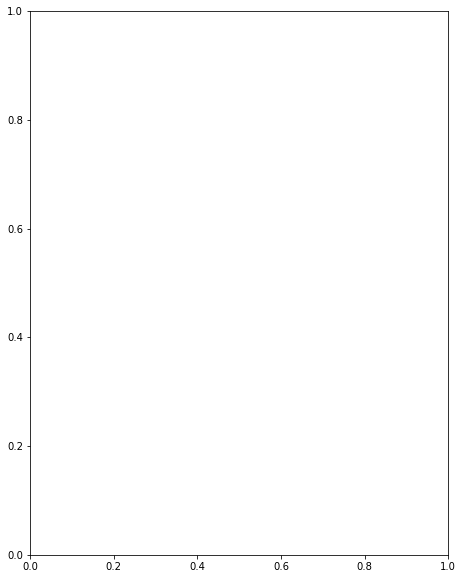

In [215]:
drawCaseDensity('estimate_cases1_density')

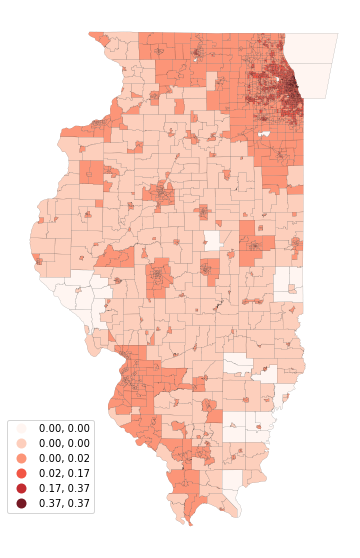

In [216]:
drawCaseDensity('estimate_cases2_density')

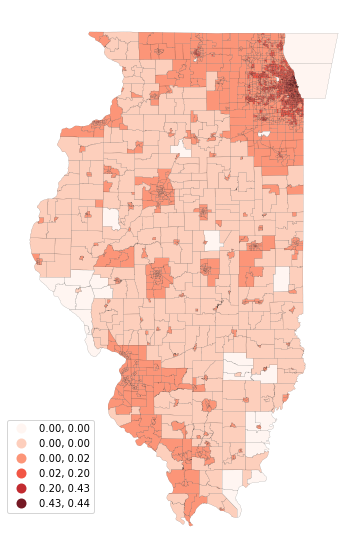

In [217]:
drawCaseDensity('estimate_cases3_density')

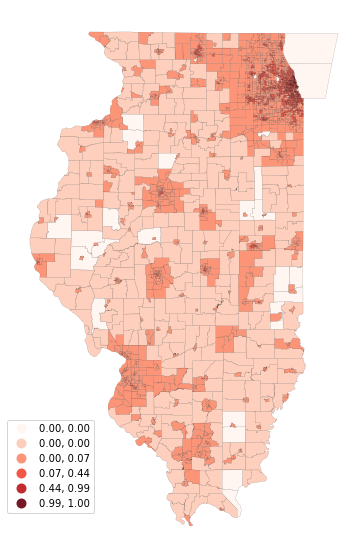

In [218]:
drawCaseDensity('estimate_cases4_density')

In [ ]:
def drawExposure(col, path):
    case_map = info_case_gdf.plot(
        column=col,
        cmap='Reds',
        edgecolor='black',
        linewidth = 0.1,
        alpha = 0.9, 
        legend = True,

        figsize = (10,10),
                     )
    exposure_map.axis('off')
    plt.savefig(path, dpi = 200)